<a href="https://colab.research.google.com/github/KieuSonTung/Data_Preparation/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(original_label)

[0 0 0 ... 2 2 2]


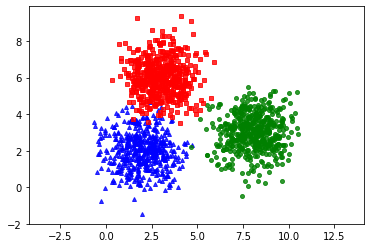

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [4]:
def Kmeans_display(df, label):
    u_labels = np.unique(label)
    
    for i in u_labels:
        plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.legend()
    plt.show()

In [5]:
def K_means(n):  
    m = len(X)
    k = np.random.randint(m, size=n)
    c = np.empty(m)
    mean_k = X[k]
    J = np.empty(n)
    running = True

    while running:
        for i in range(0, m):
            c[i] = np.argmin(np.linalg.norm(X[i] - mean_k, axis=1))

        for i in range(0, n):
            mean_k[i] = np.mean(X[np.where(c==i)], axis=0)
            J_prev = J
            J[i] = (1/m) * np.sum(np.linalg.norm(X[np.where(c==i)] - mean_k[i]), axis=0)
            # print(J)

            comparison = J_prev == J
            if comparison.all():
                running = False
    return c




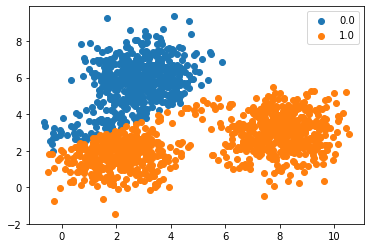

In [6]:
c = K_means(2)
Kmeans_display(X, c)
# With 2 clusters, the model performs pretty good. It can classify two main areas
# of the given dataset

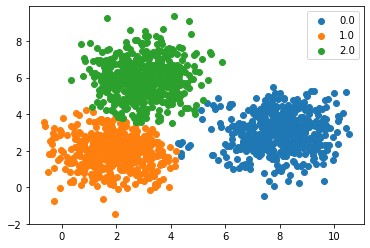

In [10]:
c = K_means(3)
Kmeans_display(X, c)
# By far, the model performs best with 3 clusters

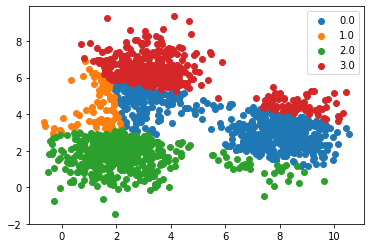

In [12]:
c = K_means(4)
Kmeans_display(X, c)
# With 4 clusters, the variance of some classes is quite large, the model 
# doesn't perform well